<a href="https://colab.research.google.com/github/shadowclone/winter-bird/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

## Loading Necessary Datasets

In [39]:
tit_data= pd.read_csv("/content/train.csv")
print(tit_data.shape)
tit_data.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Assessment of missing values

In [ ]:
tit_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
print('Misiing Age Values: ',((tit_data['Age'].isnull().sum()/tit_data.shape[0])*100),'%')
print('Misiing Cabin Values: ',((tit_data['Cabin'].isnull().sum()/tit_data.shape[0])*100),'%')
print('Misiing Embarked Values: ',((tit_data['Embarked'].isnull().sum()/tit_data.shape[0])*100),'%')

Misiing Age Values:  19.865319865319865 %
Misiing Cabin Values:  77.10437710437711 %
Misiing Embarked Values:  0.22446689113355783 %


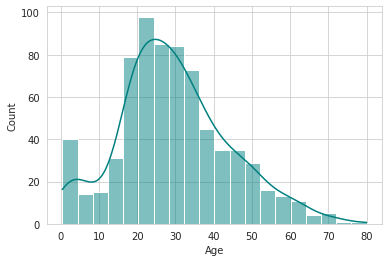

In [ ]:
sns.histplot(data=tit_data, x="Age",kde='True',color="teal")

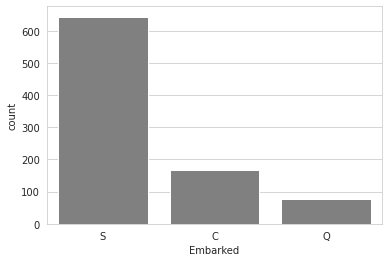

In [ ]:
sns.countplot(data=tit_data, x="Embarked",color="grey")

In [ ]:
train_data=tit_data.copy()
train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_data['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)
tit_data=train_data.copy()

In [ ]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Cleaning up data

The names, passengerID,Ticket are not relevant so we will drop them.

In [ ]:
train_data.drop('Name', axis=1, inplace=True)
train_data.drop('Ticket', axis=1, inplace=True)
train_data.drop('PassengerId', axis=1, inplace=True)

we can split the Pclass column into 3 categorical columns Pclass_1 Pclass_2 and Pclass_3 for Pclass 1 2 and 3 respectively each containg 0 or 1. Further we will drop Pclass column. We will do same for the other two.

In [ ]:
temp=pd.get_dummies(train_data, columns=['Sex'], drop_first=True)
temp.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [ ]:
temp=pd.get_dummies(temp, columns=['Pclass'])
temp.head()

,Survived,Age,SibSp,Parch,Fare,Embarked,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,S,1,0,0,1
1,1,38.0,1,0,71.2833,C,0,1,0,0
2,1,26.0,0,0,7.9250,S,0,0,0,1
3,1,35.0,1,0,53.1000,S,0,1,0,0
4,0,35.0,0,0,8.0500,S,1,0,0,1


In [ ]:
temp=pd.get_dummies(temp, columns=['Embarked'])
temp.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,0,1,0,0,1


SibSp and Parch refer to the number of the Siblings/spouses , Parents/Children respectively so we merge them into a single variable Single which contains 0 if the paseenger is alone and 0 if he/she isn't.

In [ ]:
temp['Single']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
temp.drop('SibSp', axis=1, inplace=True)
temp.drop('Parch', axis=1, inplace=True)
train_data=temp
train_data.head()

,Survived,Age,Fare,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Single
0,0,22.0,7.2500,1,0,0,1,0,0,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,0,0,0,1,0,0,1,1
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


Now we Apply same changes to the test data

## Exploratory Analysis of Data:

#### Age-

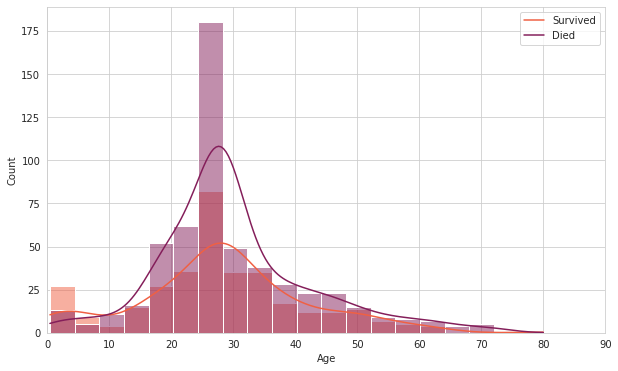

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data=train_data,x='Age',hue='Survived',palette="rocket",bins=20,kde='true',alpha=0.5)
plt.legend(['Survived', 'Died'])
ax.set(xlabel='Age')
plt.xlim(0,90)
plt.show()

The people who are younger then ~16 have higher chance of survival hence we add a new categorical variable IsMinor

In [ ]:
train_data['IsMinor']=np.where(train_data['Age']<=16, 1, 0)

#### Fare -

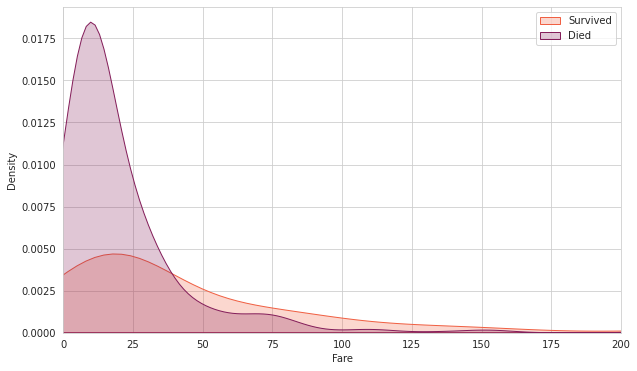

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(data=train_data,x='Fare',hue='Survived',palette="rocket",shade='True')
plt.legend(['Survived', 'Died'])
ax.set(xlabel='Fare')
plt.xlim(0,200)
plt.show()

From the above density plot the fare seems to be a pretty significant factor. People who paid higher fares had better shot at survival.

#### Gender-

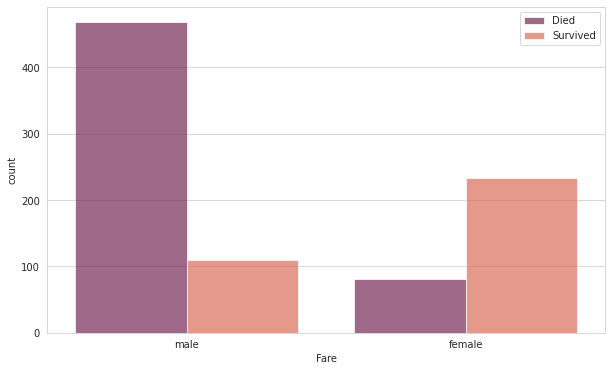

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=tit_data,x='Sex',hue='Survived',palette="rocket",alpha=0.7)
plt.legend(['Died','Survived'])
ax.set(xlabel='Fare')
plt.show()

#### Pclass-

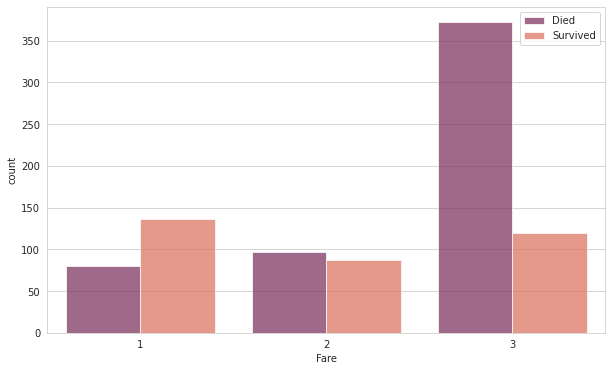

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=tit_data,x='Pclass',hue='Survived',palette="rocket",alpha=0.7)
plt.legend(['Died','Survived'])
ax.set(xlabel='Fare')
plt.show()

#### Embarked-

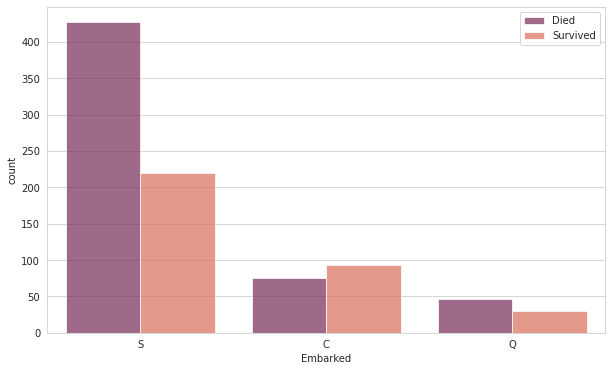

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=tit_data,x='Embarked',hue='Survived',palette="rocket",alpha=0.7)
plt.legend(['Died','Survived'])
ax.set(xlabel='Embarked')
plt.show()

#### Single

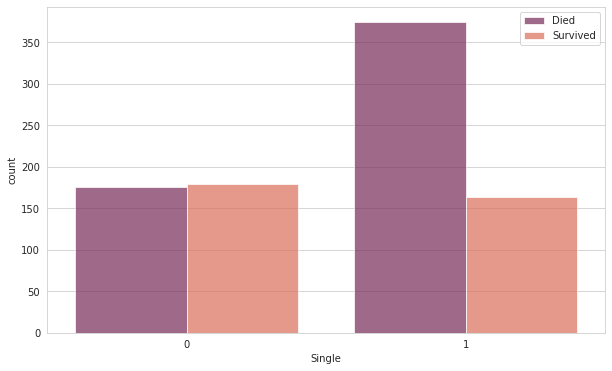

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=train_data,x='Single',hue='Survived',palette="rocket",alpha=0.7)
plt.legend(['Died','Survived'])

After analysing this one can conclude that gender and Passenger class were pretty significant factors in deciding the survival. Also the people who Embarked at C - Cherbourg seem to have better chances of survival, and the people who were travelling with the family appear to have better probabilities of survival.

## Logistic Regression

In [ ]:
x=train_data.drop("Survived",axis=1)
y=train_data["Survived"]
cols=list(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=11)

In [ ]:
from sklearn.preprocessing import StandardScaler#scaling the features
scaler= StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test, y_pred)

0.8491620111731844

In [ ]:
confusion_matrix(y_test, y_pred)

array([[107,  11],
       [ 16,  45]])

## Predict

In [ ]:
Name=input("Input name(not relevant):")
Age=float(input("Input Age(0-90):"))
while Age not in range(0,91):
    Age=float(input("Not a valid Age! Enter Age Again: "))
Fare=float(input("Input Fare ('Input the fare somewhere between 0-200 for more accurate prediction') max=500: "))
while Fare not in range(501):
    Fare=float(input("Invalid Fare Amount!!! Input Fare(0-500):"))
Embarked=input("Embarked From(C = Cherbourg, Q = Queenstown, S = Southampton):").upper()
while Embarked not in ['S','Q','C']:
    Embarked=input("Invalid!! Embarked From (C = Cherbourg, Q = Queenstown, S = Southampton):").upper()
Pclass=int(input("Passenger Class  (1 = 1st, 2 = 2nd, 3 = 3rd): "))
while Pclass not in range(1,4):
    Pclass=int(input("Invalid Passenger Class!! Passenger Class  (1 = 1st, 2 = 2nd, 3 = 3rd): "))    
Sex=input("Gender(male/female): ").lower()
while Sex not in ["male","female"]:
    Sex=input("Not a valid input!! Gender(male/female): ").lower()
SibSp=int(input("Enter Number of Siblings/Spouce: "))
if SibSp==None:
    SibSp=0
Parch=int(input("Enter Number of Parents/Children: "))
if Parch==None:
    Parch=0
Ticket=input("Ticket(Not Relevant ):")
PassengerId=input("PassengerId (not relevent): ")


Input name(not relevant):Sumit
Input Age(0-90):23
Input Fare ('Input the fare somewhere between 0-200 for more accurate prediction') max=500: 45
Embarked From(C = Cherbourg, Q = Queenstown, S = Southampton):Q
Passenger Class  (1 = 1st, 2 = 2nd, 3 = 3rd): 2
Gender(male/female): male
Enter Number of Siblings/Spouce: 1
Enter Number of Parents/Children: 2
Ticket(Not Relevant ):
PassengerId (not relevent): 


In [ ]:

input_dict = {key: None for key in cols}
input_dict['Age']=Age
input_dict['Fare']=Fare
input_dict['Sex_male']=1 if (Sex=="male") else 0
input_dict['Pclass_1']=1 if(Pclass==1) else 0
input_dict['Pclass_2']=1 if(Pclass==2) else 0
input_dict['Pclass_3']=1 if(Pclass==3) else 0
input_dict['Embarked_C']=1 if(Embarked=='C') else 0
input_dict['Embarked_Q']=1 if(Embarked=='Q') else 0
input_dict['Embarked_S']=1 if(Embarked=='S') else 0
input_dict['Single']=1 if(SibSp+Parch==0) else 0
input_dict['IsMinor']=1 if(Age<=16) else 0
print(input_dict)
test_data=np.array(list(i for i in input_dict.values()))
test_data=test_data.reshape(1,-1)
test_data=scaler.transform(test_data)

{'Age': 23.0, 'Fare': 45.0, 'Sex_male': 0, 'Pclass_1': 0, 'Pclass_2': 1, 'Pclass_3': 0, 'Embarked_C': 0, 'Embarked_Q': 1, 'Embarked_S': 0, 'Single': 0, 'IsMinor': 0}


In [ ]:
ans= logreg.predict(test_data)
print(ans)
ans_p= logreg.predict_proba(test_data)
print(ans_p)
print(f"{Name+''''s''' if (Name is not '') else 'Your'} chances of survival are roughly {ans_p[0][1]*100:.2f} %")
print("Probably would have survived") if (ans ==1) else print("Things don't look very good. Probaly wouldn't have survived")

[1]
[[0.13909474 0.86090526]]
Sumit's chances of survival are roughly 86.09 %
Probably would have survived


## Refrences:

https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python#4.-Logistic-Regression-and-Results

https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe

https://www.geeksforgeeks.org/how-to-convert-dictionary-to-pandas-dataframe/

https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

https://seaborn.pydata.org/generated/seaborn.histplot.html?highlight=histplot#seaborn.histplot

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://stackoverflow.com/questions/16858652/how-to-find-the-corresponding-class-in-clf-predict-proba#16859091

https://datascienceplus.com/logistic-regression-with-python-using-titanic-data/